In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('HOUST1FNSA.csv',index_col=0,parse_dates=True)
df

,HOUST1FNSA
DATE,
1959-01-01,75.7
1959-02-01,78.8
1959-03-01,102.2
1959-04-01,122.3
1959-05-01,123.8
...,...
2023-02-01,58.9
2023-03-01,71.4
2023-04-01,78.8


In [7]:
df.index

DatetimeIndex(['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01',
               ...
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01'],
              dtype='datetime64[ns]', name='DATE', length=774, freq=None)

In [8]:
df.index.freq = 'MS'
df.index.freq

<MonthBegin>

<Axes: xlabel='DATE'>

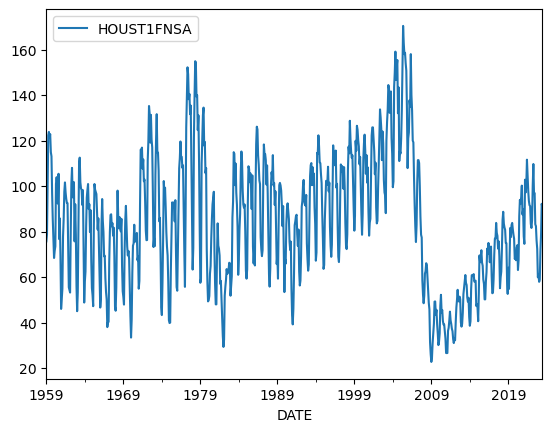

In [9]:
df.plot()

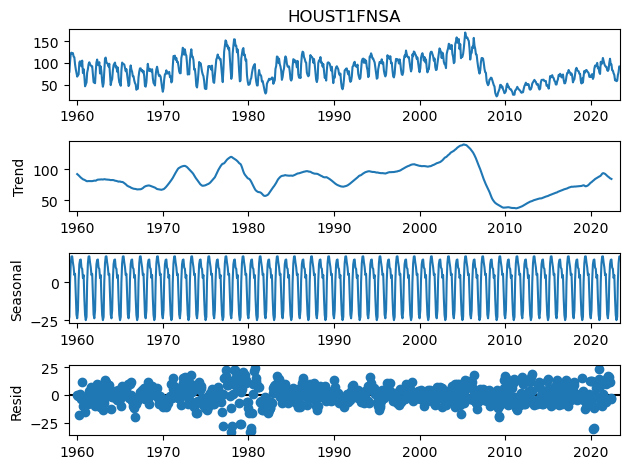

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
y = df['HOUST1FNSA']
decom = seasonal_decompose(y,period=24)
decom.plot()
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller # confirms stationary
dftest = adfuller(y)

In [13]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# of Lags','# of Obs'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic           -3.021513
p-value                   0.032934
# of Lags                21.000000
# of Obs                752.000000
Critical Value (1%)      -3.439076
Critical Value (5%)      -2.865391
Critical Value (10%)     -2.568821
dtype: float64


In [14]:
y_diff = y.diff().diff(24)

<Axes: xlabel='DATE'>

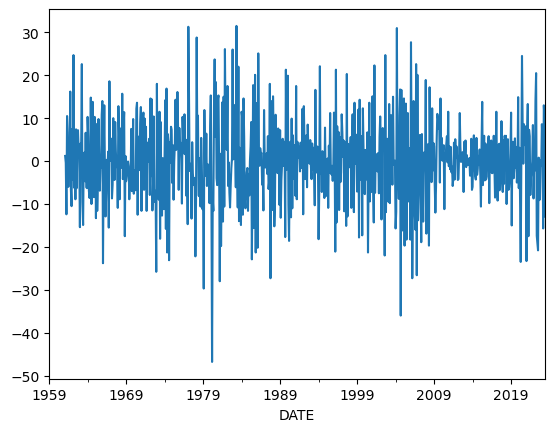

In [15]:
y_diff.plot()

In [16]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# of Lags','# of Obs'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic           -3.021513
p-value                   0.032934
# of Lags                21.000000
# of Obs                752.000000
Critical Value (1%)      -3.439076
Critical Value (5%)      -2.865391
Critical Value (10%)     -2.568821
dtype: float64


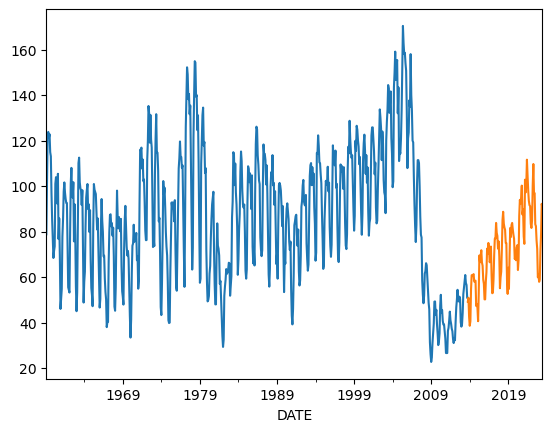

In [17]:
# split data
train_size = int(len(y)*0.85)
train = y[1:train_size]
test = y[train_size:]
train.plot(label='Train')
test.plot(label='Test')
plt.show()